In [1]:
# check the current python version, make sure this is the one that with HDDM correctly installed
import sys
sys.executable

'C:\\Users\\kalai\\Anaconda2\\python.exe'

In [2]:
%matplotlib inline
# Preparation
import os, hddm, time, csv
import datetime

# import the toolbox
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

# set the color of plots
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmykw')

C:\Users\kalai\Anaconda2\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [6]:
# load data from cateogriztion based on moral valence
dat_M_match = hddm.load_csv('ideal_self_eng.csv')

dat_M_match.head(100)  

,subj_idx,Block,SubTrial,Label,Shape,rt,stim,response,Matching
0,57,1,4,ideal_self,square,0.200,0,0,mismatch
1,92,1,22,ideal_self,circle,0.202,0,0,mismatch
2,57,1,41,ideal_self,circle,0.205,1,0,match
3,33,1,51,ideal_self,square,0.208,0,1,mismatch
4,76,1,5,ought_self,square,0.214,0,1,mismatch
5,76,1,47,ideal_self,triangle,0.216,0,0,mismatch
6,5,1,30,actual_self,circle,0.218,1,1,match
7,6,1,58,ought_self,square,0.221,0,1,mismatch
8,54,1,44,ought_self,triangle,0.221,0,1,mismatch
9,57,1,44,ideal_self,square,0.223,0,0,mismatch


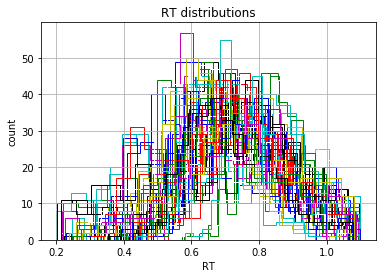

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in dat_M_match.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
plt.savefig('distribution.pdf')

In [29]:
nsample = 10000,  # number of sampling
nburn   = 5000,

# number of burn

# dateToday = str(date.today())  # replace the code below if you prefer using the actual date
dateToday = 'final' # using final in the saved file name

#### Model 1

In [8]:
start_time = time.time()  # the start time of the processing
 
import warnings           # suppress the warnings
warnings.simplefilter('ignore')

dbname = "M_match_m1_" 
M_match_m1 = hddm.HDDMStimCoding(dat_M_match, 
                                    include=('z'), 
                                    stim_col='stim', 
                                    depends_on={'v':['Label','Matching'],'t':['Label','Matching']},
                                    split_param='v', 
                                    drift_criterion=False,
                                    p_outlier=0.05)
                            

M_match_m1.find_starting_values()
M_match_m1.sample(nsample, burn=nburn, dbname=dbname+ '.db', db='pickle')
   
# save the model
M_match_m1.save(dbname)
print("M_match_m1_selfie DIC: %f" %M_match_m1.dic) # DIC: 6301.493042

 [-----------------100%-----------------] 10001 of 10000 complete in 24361.8 secM_match_m1_selfie DIC: 6301.493042


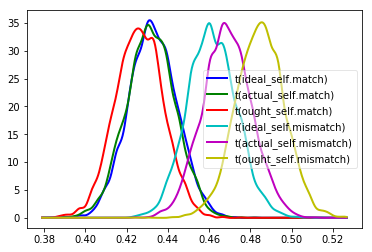

In [10]:
t_idealself_ma,t_actualself_ma,t_oughtself_ma,t_idealself_mis,t_actualself_mis,t_oughtself_mis=M_match_m1.nodes_db.node[['t(ideal_self.match)','t(actual_self.match)','t(ought_self.match)','t(ideal_self.mismatch)','t(actual_self.mismatch)','t(ought_self.mismatch)']]
hddm.analyze.plot_posterior_nodes([t_idealself_ma,t_actualself_ma,t_oughtself_ma,t_idealself_mis,t_actualself_mis,t_oughtself_mis])

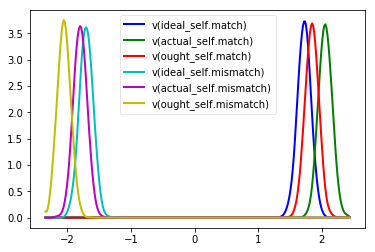

In [11]:
v_idealself_ma,v_actualself_ma,v_oughtself_ma,v_idealself_mis,v_actualself_mis,v_oughtself_mis=M_match_m1.nodes_db.node[['v(ideal_self.match)','v(actual_self.match)','v(ought_self.match)','v(ideal_self.mismatch)','v(actual_self.mismatch)','v(ought_self.mismatch)']]
hddm.analyze.plot_posterior_nodes([v_idealself_ma,v_actualself_ma,v_oughtself_ma,v_idealself_mis,v_actualself_mis,v_oughtself_mis])

In [15]:
print "P_(v_idealself_ma <v_oughtself_ma)=",(v_idealself_ma.trace() <v_oughtself_ma.trace()).mean()
print "P_(v_idealself_ma <v_actualself_ma)=",(v_idealself_ma.trace() <v_actualself_ma.trace()).mean()
print "P_(v_oughtself_ma <v_actualself_ma)=",(v_oughtself_ma.trace() <v_actualself_ma.trace()).mean()


P_(v_idealself_ma <v_oughtself_ma)= 0.791
P_(v_idealself_ma <v_actualself_ma)= 0.9865555555555555
P_(v_oughtself_ma <v_actualself_ma)= 0.9213333333333333


In [16]:
print "P_(t_idealself_ma <t_oughtself_ma)=",(t_idealself_ma.trace() <t_oughtself_ma.trace()).mean()
print "P_(t_idealself_ma <t_actualself_ma)=",(t_idealself_ma.trace() <t_actualself_ma.trace()).mean()
print "P_(t_oughtself_ma <t_actualself_ma)=",(t_oughtself_ma.trace() <t_actualself_ma.trace()).mean()

P_(t_idealself_ma <t_oughtself_ma)= 0.34344444444444444
P_(t_idealself_ma <t_actualself_ma)= 0.4728888888888889
P_(t_oughtself_ma <t_actualself_ma)= 0.6267777777777778


#### Model 2

In [9]:
dbname = "M_match_m2_" 
M_match_m2 = hddm.HDDMStimCoding(dat_M_match, 
                                    include=('z'), 
                                    stim_col='stim', 
                                    depends_on={'v':['Label','Matching'],'t':['Label','Matching'],'a':['Label']},
                                    split_param='v', 
                                    drift_criterion=False,
                                    p_outlier=0.05)
                            

M_match_m2.find_starting_values()
M_match_m2.sample(nsample, burn=nburn, dbname=dbname+ '.db', db='pickle')
   
# save the model
M_match_m2.save(dbname)
print("M_match_m2_selfie DIC: %f" %M_match_m2.dic) #DIC: 6371.919196

 [-----------------100%-----------------] 10001 of 10000 complete in 25067.4 secM_match_m2_selfie DIC: 6371.919196


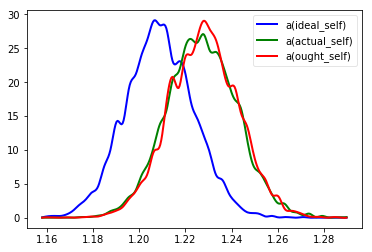

In [18]:
a_idealself_ma,a_actualself_ma,a_oughtself_ma=M_match_m2.nodes_db.node[['a(ideal_self)','a(actual_self)','a(ought_self)']]
hddm.analyze.plot_posterior_nodes([a_idealself_ma,a_actualself_ma,a_oughtself_ma])

In [20]:
print "P_(a_idealself_ma <a_oughtself_ma)=",(a_idealself_ma.trace() <a_oughtself_ma.trace()).mean()
print "P_(a_idealself_ma <a_actualself_ma)=",(a_idealself_ma.trace() <a_actualself_ma.trace()).mean()
print "P_(a_oughtself_ma <a_actualself_ma)=",(a_oughtself_ma.trace() <a_actualself_ma.trace()).mean()

P_(a_idealself_ma <a_oughtself_ma)= 0.8241111111111111
P_(a_idealself_ma <a_actualself_ma)= 0.8114444444444444
P_(a_oughtself_ma <a_actualself_ma)= 0.4807777777777778


In [21]:
print "P_(v_idealself_ma <v_oughtself_ma)=",(v_idealself_ma.trace() <v_oughtself_ma.trace()).mean()
print "P_(v_idealself_ma <v_actualself_ma)=",(v_idealself_ma.trace() <v_actualself_ma.trace()).mean()
print "P_(v_oughtself_ma <v_actualself_ma)=",(v_oughtself_ma.trace() <v_actualself_ma.trace()).mean()
print "P_(t_idealself_ma <t_oughtself_ma)=",(t_idealself_ma.trace() <t_oughtself_ma.trace()).mean()
print "P_(t_idealself_ma <t_actualself_ma)=",(t_idealself_ma.trace() <t_actualself_ma.trace()).mean()
print "P_(t_oughtself_ma <t_actualself_ma)=",(t_oughtself_ma.trace() <t_actualself_ma.trace()).mean()

P_(v_idealself_ma <v_oughtself_ma)= 0.791
P_(v_idealself_ma <v_actualself_ma)= 0.9865555555555555
P_(v_oughtself_ma <v_actualself_ma)= 0.9213333333333333
P_(t_idealself_ma <t_oughtself_ma)= 0.34344444444444444
P_(t_idealself_ma <t_actualself_ma)= 0.4728888888888889
P_(t_oughtself_ma <t_actualself_ma)= 0.6267777777777778


In [22]:
from kabuki.analyze import check_geweke
print check_geweke(M_match_m2)

AssertionError: Chain of knode_name                 a
stochastic              True
observed               False
subj                   False
node          a(actual_self)
tag           (actual_self,)
depends              [Label]
hidden                 False
subj_idx                 NaN
Block                    NaN
SubTrial                 NaN
Label            actual_self
Shape                    NaN
rt                       NaN
stim                     NaN
response                 NaN
Matching                 NaN
mean                 1.22705
std                0.0148366
2.5q                 1.19852
25q                  1.21696
50q                  1.22689
75q                  1.23704
97.5q                1.25637
mc err           0.000375583
map                   1.1865
Name: a(actual_self), dtype: object not properly converged

Plotting a(actual_self)
Plotting a(ideal_self)
Plotting a(ought_self)
Plotting a_std
Plotting v(actual_self.match)
Plotting v(actual_self.mismatch)
Plotting v(ideal_self.match)
Plotting v(ideal_self.mismatch)
Plotting v(ought_self.match)
Plotting v(ought_self.mismatch)
Plotting v_std
Plotting t(actual_self.match)
Plotting t(actual_self.mismatch)
Plotting t(ideal_self.match)
Plotting t(ideal_self.mismatch)
Plotting t(ought_self.match)
Plotting t(ought_self.mismatch)
Plotting t_std
Plotting z
Plotting z_std


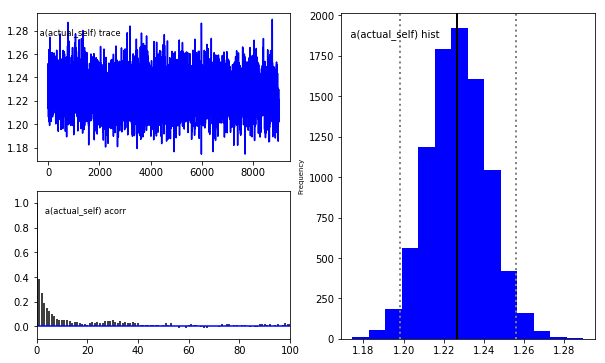

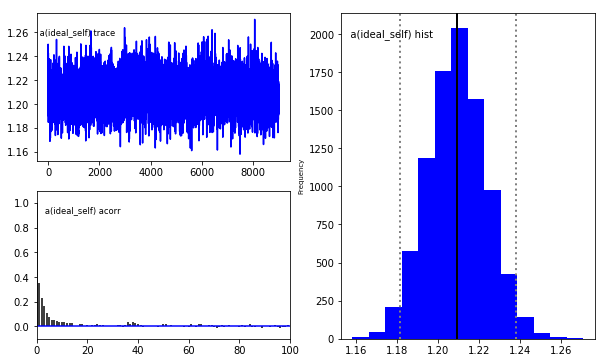

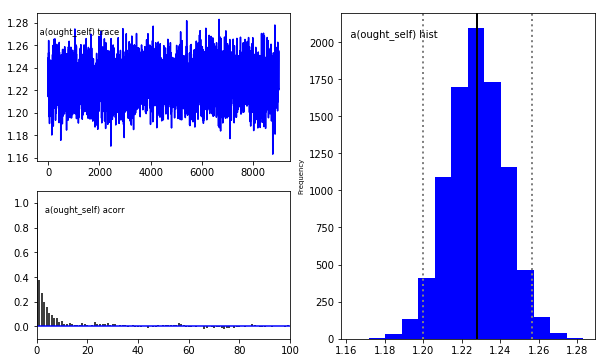

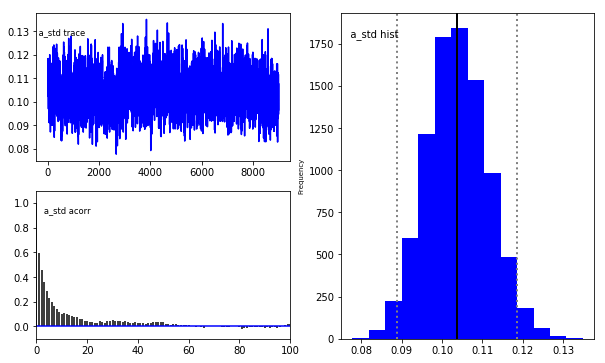

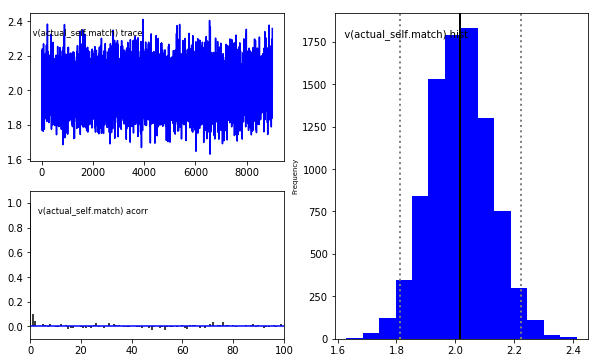

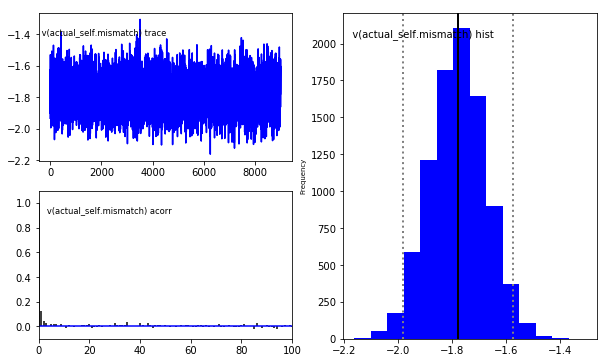

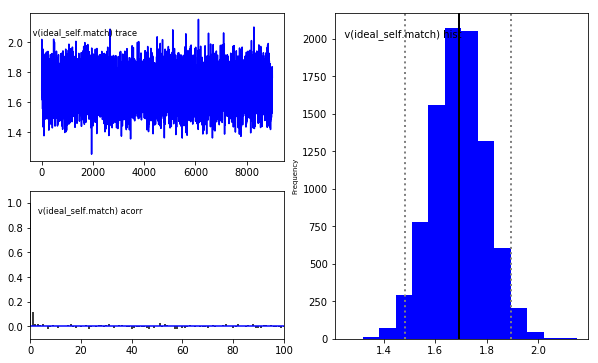

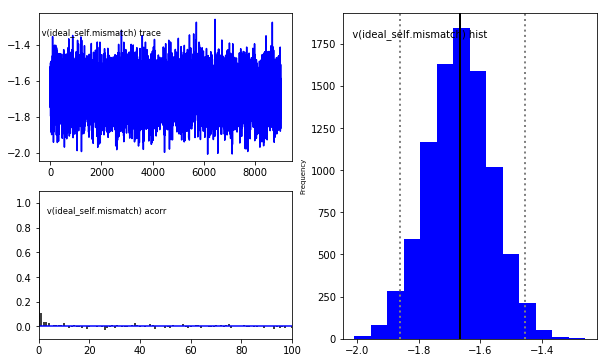

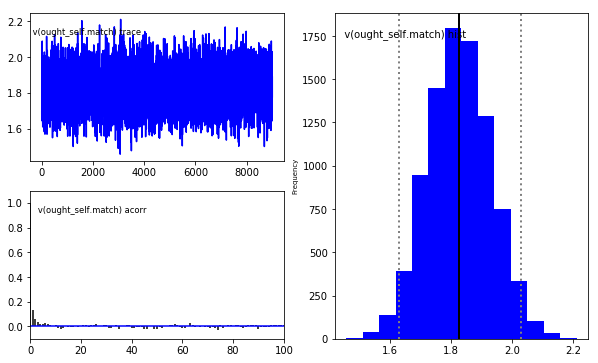

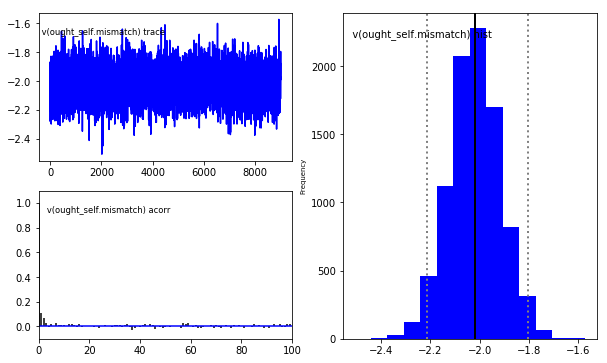

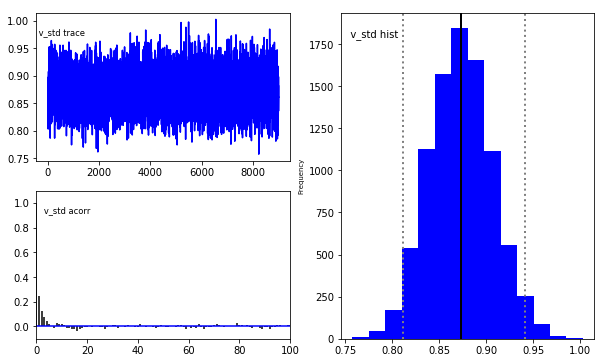

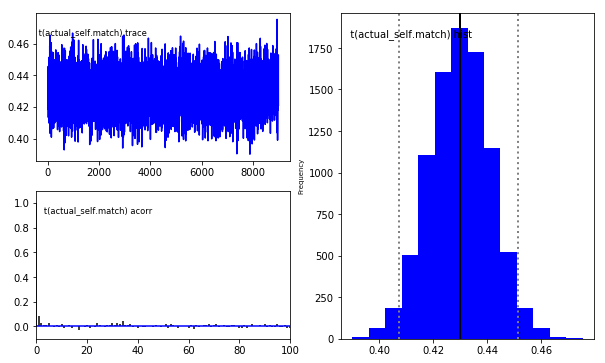

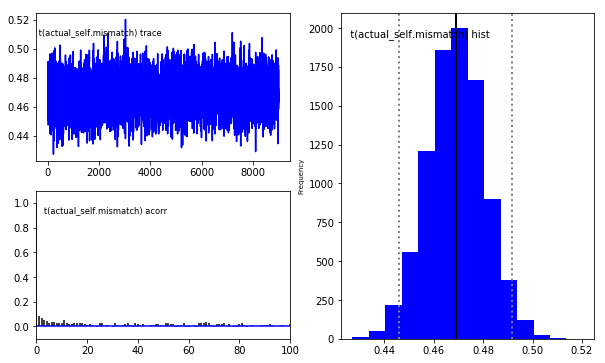

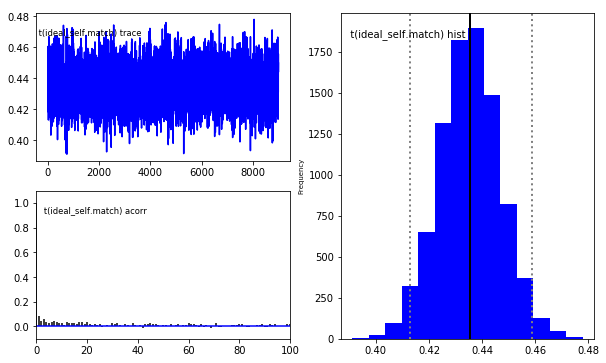

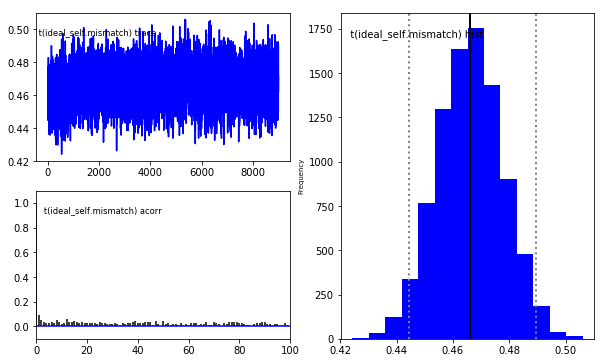

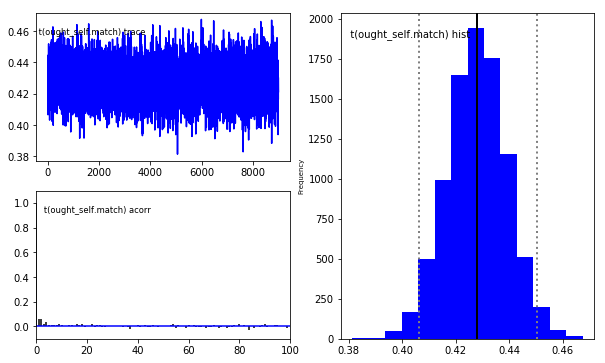

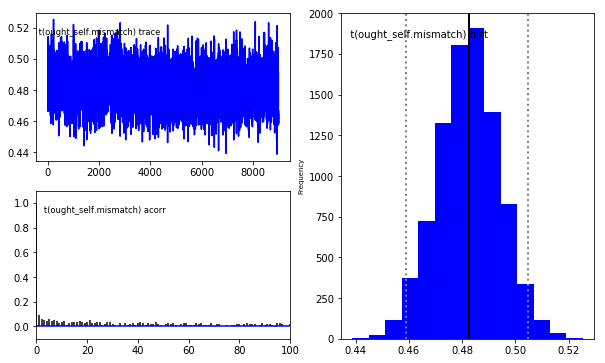

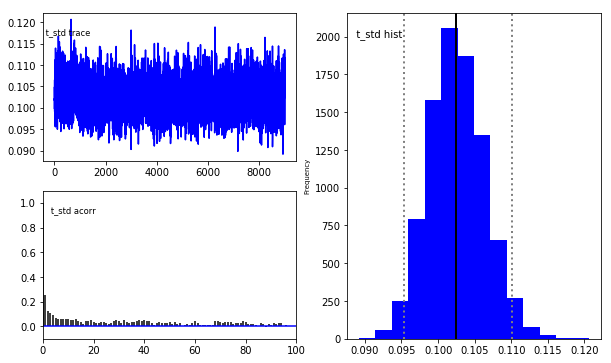

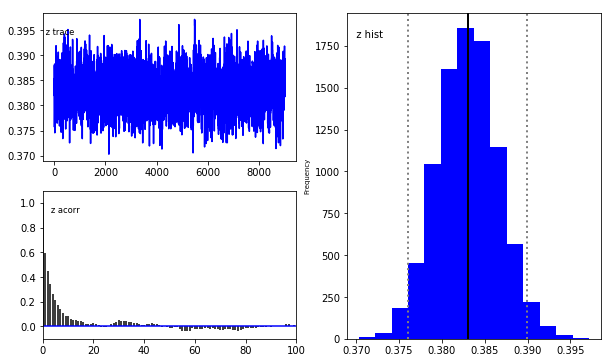

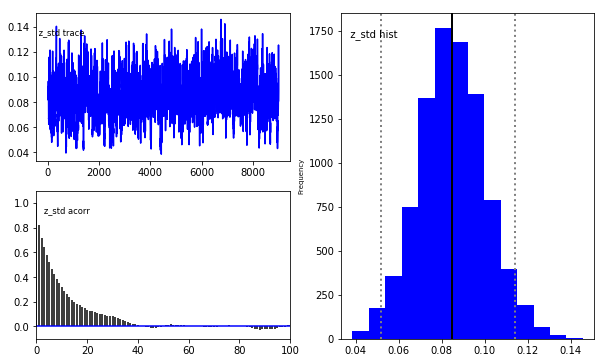

In [23]:
M_match_m2.plot_posteriors()

In [ ]:
#### Model 3

In [31]:
dbname = "M_match_m3_" 
M_match_m3 = hddm.HDDMStimCoding(dat_M_match, 
                                    include=('z'), 
                                    stim_col='stim', 
                                    depends_on={'v':['Label','Matching'],'t':['Label','Matching'],'a':['Label']},
                                    split_param='v', 
                                    drift_criterion=False,
                                    p_outlier=0.05)
                            

M_match_m3.find_starting_values()
M_match_m3.sample(10000, burn=5000,thin=5, dbname=dbname+ '.db', db='pickle')
   
# save the model
M_match_m3.save(dbname)
print("M_match_m3_selfie DIC: %f" %M_match_m3.dic) #

 [-----------------100%-----------------] 10001 of 10000 complete in 26227.5 secM_match_m3_selfie DIC: 6388.059384


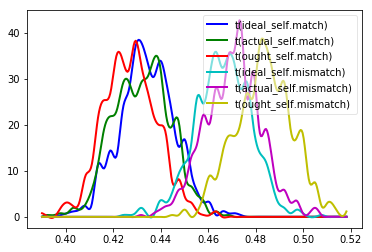

In [33]:
t_idealself_ma,t_actualself_ma,t_oughtself_ma,t_idealself_mis,t_actualself_mis,t_oughtself_mis=M_match_m3.nodes_db.node[['t(ideal_self.match)','t(actual_self.match)','t(ought_self.match)','t(ideal_self.mismatch)','t(actual_self.mismatch)','t(ought_self.mismatch)']]
hddm.analyze.plot_posterior_nodes([t_idealself_ma,t_actualself_ma,t_oughtself_ma,t_idealself_mis,t_actualself_mis,t_oughtself_mis])

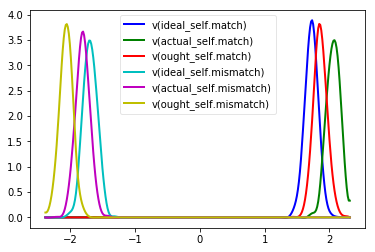

In [32]:
v_idealself_ma,v_actualself_ma,v_oughtself_ma,v_idealself_mis,v_actualself_mis,v_oughtself_mis=M_match_m3.nodes_db.node[['v(ideal_self.match)','v(actual_self.match)','v(ought_self.match)','v(ideal_self.mismatch)','v(actual_self.mismatch)','v(ought_self.mismatch)']]
hddm.analyze.plot_posterior_nodes([v_idealself_ma,v_actualself_ma,v_oughtself_ma,v_idealself_mis,v_actualself_mis,v_oughtself_mis])

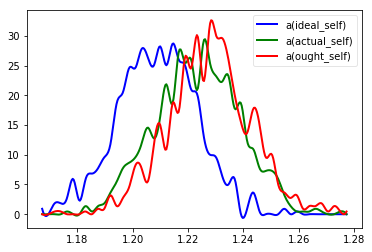

In [34]:
a_idealself_ma,a_actualself_ma,a_oughtself_ma=M_match_m3.nodes_db.node[['a(ideal_self)','a(actual_self)','a(ought_self)']]
hddm.analyze.plot_posterior_nodes([a_idealself_ma,a_actualself_ma,a_oughtself_ma])